模型斜率 54.66650868076128
模型截距 [70.54511908]
当假设浓度为 0.8mg/l 时，利用模型预测通量为： 114.27832602648522 t


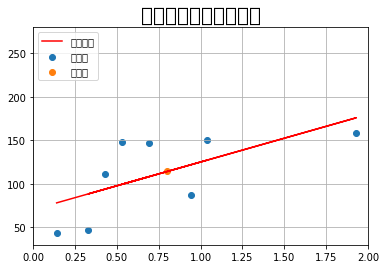

In [2]:
# regression analysis test case
# author lan
# 19.11.14

import numpy as np
from pandas  import read_csv
from matplotlib import pyplot as plt
# from sklearn.linear_model import LinearRegression
from sklearn import linear_model
# from UdxDataset import *
import pandas as pd
import requests

#浓度数据
nd_data=[1.040000, 0.940000, 0.530000, 1.930000, 0.430000, 0.330000, 0.690000, 0.140000]
#通量数据
tl_data=[151.0, 87.000000, 148.000000, 159.000000, 111.000000, 47.000000, 147.000000, 44.000000]

#数组转为矩阵，作为模型训练的输入数据
x = pd.DataFrame(nd_data)
y = pd.DataFrame(tl_data)
# 调用线性回归函数
clf = linear_model.LinearRegression()

# print(x,y)
# 开始线性回归计算
clf.fit(x,y)
# 得到斜率
print("模型斜率",clf.coef_[0][0])
# 得到截距
print("模型截距",clf.intercept_)

#利用模型，输入浓度为0.8预测通量
predict_nd=[[0.8]]
predict_tl=clf.predict(predict_nd)
print("当假设浓度为 0.8mg/l 时，利用模型预测通量为：",predict_tl[0][0],"t")

#绘制散点图
plt.scatter(nd_data[:8],tl_data[:8],label='观测值')
plt.scatter(predict_nd[0],predict_tl[0],label='预测值')
#绘制线
plt.plot(x, x*clf.coef_[0][0]+clf.intercept_, color='r',label='模拟曲线')
plt.axis([0,2,30,280])
plt.legend(loc = 'upper left')#显示图例，设置图例的位置
plt.title("通量与浓度的回归关系", fontsize=20)
plt.grid(b=True)#加网格
plt.show()
